# Proyecto: El Desafío de Don Rene

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña






# Proyecto

### Equipo:

- Catalina Contreras
- Santiago Valdivieso

- \<Nombre de usuarios en Codalab\>

- \<Nombre del Equipo en Codalab\>

### Link de repositorio de GitHub: `\<http://....\>`




## 1. Introducción

El objetivo de este proyecto consiste en desarrollar dos problemas, uno de Clasificación de potenciales evaluaciones con las que los jugadores evaluarán los juegos. Las posibles clases que deben asignar a cada juego son ('Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive'). Y el otro es un problema de  regresión de las potenciales ventas que tendrán los juegos. 

Para esto, se cuenta con un dataset de 7881 videojuegos con 16 columnas que contienen información de los juegos de la plataforma Steam (nombre, fecha de lanzamiento, si está en ingles o no, sus desarrolladores, el publicante, las plataformas en que se usan, la edad mínima requerida para jugarlo, las categorías de juego que tiene, los géneros, tags, logros disponibles, tiempo promedio de juego, precio y una descripción) más las etiquetas y valores a predecir.
Son N atributos y la variables objetivos son de tipo ... y ...

La primera tarea se evalua en base a la métrica F-score del problema de clasificación ya que esta es una pondearcón entre las métricas recall y precision, por lo que penaliza de manera similar tanto los falsos negativos como falsos positivos. Por el lado del problema de regresión se utilizará la métrica R cuadrado el cual determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo

Nuestra propuesta para resolver el problema consistieron en modelo basado en...

Nuestro modelo cumplió/no cumplió las expectativas...

---
## 2. Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# --> Código aquí  <--
# Nota: Si usan pandas-profiling, usar el modo widget o html para adjuntar sus resultados al notebook de entrega*

# df_train = pd.read_csv(...)

# px.histograms(...)

# cov = df_train.cov()
# px.heatmap(cov, ...)

# px.scatter(proyecciones)
# etc...

In [3]:
df_train = pd.read_json('train.json')
df_test = pd.read_json('test.json')


#df_train = pd.read_pickle('train.pickle')
#df_test = pd.read_pickle('test.pickle')

In [4]:
df_train

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,An Aspie Life,2018-03-29,1,Bradley Hennessey;Joe Watson,EnderLost Studios,windows,0,Single-player;Steam Achievements,Adventure;Casual;Free to Play;Indie;Simulation,Free to Play;Adventure;Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,GhostControl Inc.,2014-06-06,1,bumblebee,Application Systems Heidelberg,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy,Turn-Based;Indie;Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,Deponia,2012-08-06,1,Daedalic Entertainment,Daedalic Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,Atlas Reactor,2016-10-04,1,Trion Worlds,Trion Worlds,windows,0,Multi-player;Online Multi-Player;Steam Achieve...,Free to Play;Strategy,Free to Play;Multiplayer;Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,CHUCHEL,2018-03-07,1,Amanita Design,Amanita Design,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7876,KOEWOTAYORINI / 声之寄托,2018-03-26,0,あみそ組,Pujia8 Studio;Gamera Game,windows,0,Single-player;Steam Achievements;Steam Cloud,Adventure;Free to Play;Indie;RPG,Free to Play;Adventure;Anime,20,65,0.00,“喂喂，求求你啦！救救我！” ——你接到这样一个电话 发出这样的求救，给你打电话的人，是一名...,24130,Positive
7877,Montaro,2016-07-25,1,JCKSLAP,MBDL,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Memes;Cute;Casual,15,174,0.79,Montaro is a DOGE.,550368,Very Positive
7878,Moe Jigsaw,2018-03-23,1,ARES Inc.,ARES Inc.,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Casual;Nudity;Indie,72,0,2.89,&quot;Moe Jigsaw&quot; is the definitive versi...,10906,Mostly Positive
7879,Drunkn Bar Fight,2016-11-28,1,The Munky,The Munky,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Indie;Early Access,Early Access;Action;Indie,0,0,10.99,"VR PARTY GAMEDrunkn Bar Fight is a simple, imm...",18876,Mostly Positive


In [5]:
def exploratory_data_analysis(dataframe):
    print(f'1. -El Dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas\n' )
    print('2.- El Dataframe esta compuesto por las siguientes columnas: ' + str((list(dataframe.columns))))
    print('\n3.- Ejemplos de filas del DataFrame:\n')
    print('Primeras 5 filas:')
    display(dataframe.head())
    print('Últimas 5 filas:')
    display(dataframe.tail(5))
    print('Muestreo aleatorio de 5 filas:')
    display(dataframe.sample(5))
    print('\n4.- Descripción numérica del Dataframe')
    display(dataframe.describe())
    print('\n5.- Cantidad de valores nulos por columna:')
    print(dataframe.isnull().sum())
    print('\n6.- Cantidad de valores únicos por columna:')
    print(dataframe.nunique())
    print(f'\n7.- Presenta un total de {len(dataframe)-dataframe.nunique()[0]} filas con nombres duplicados.')

In [6]:
exploratory_data_analysis(df_train)

1. -El Dataframe tiene 7881 filas y 16 columnas

2.- El Dataframe esta compuesto por las siguientes columnas: ['name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'tags', 'achievements', 'average_playtime', 'price', 'short_description', 'estimated_sells', 'rating']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,An Aspie Life,2018-03-29,1,Bradley Hennessey;Joe Watson,EnderLost Studios,windows,0,Single-player;Steam Achievements,Adventure;Casual;Free to Play;Indie;Simulation,Free to Play;Adventure;Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,GhostControl Inc.,2014-06-06,1,bumblebee,Application Systems Heidelberg,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy,Turn-Based;Indie;Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,Deponia,2012-08-06,1,Daedalic Entertainment,Daedalic Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,Atlas Reactor,2016-10-04,1,Trion Worlds,Trion Worlds,windows,0,Multi-player;Online Multi-Player;Steam Achieve...,Free to Play;Strategy,Free to Play;Multiplayer;Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,CHUCHEL,2018-03-07,1,Amanita Design,Amanita Design,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive


Últimas 5 filas:


,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
7876,KOEWOTAYORINI / 声之寄托,2018-03-26,0,あみそ組,Pujia8 Studio;Gamera Game,windows,0,Single-player;Steam Achievements;Steam Cloud,Adventure;Free to Play;Indie;RPG,Free to Play;Adventure;Anime,20,65,0.00,“喂喂，求求你啦！救救我！” ——你接到这样一个电话 发出这样的求救，给你打电话的人，是一名...,24130,Positive
7877,Montaro,2016-07-25,1,JCKSLAP,MBDL,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Memes;Cute;Casual,15,174,0.79,Montaro is a DOGE.,550368,Very Positive
7878,Moe Jigsaw,2018-03-23,1,ARES Inc.,ARES Inc.,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Casual;Nudity;Indie,72,0,2.89,&quot;Moe Jigsaw&quot; is the definitive versi...,10906,Mostly Positive
7879,Drunkn Bar Fight,2016-11-28,1,The Munky,The Munky,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Indie;Early Access,Early Access;Action;Indie,0,0,10.99,"VR PARTY GAMEDrunkn Bar Fight is a simple, imm...",18876,Mostly Positive
7880,Intake,2013-11-06,1,Cipher Prime Studios,Cipher Prime Studios,windows;mac,0,Single-player;Steam Achievements;Steam Cloud;S...,Action;Indie,Indie;Action;Great Soundtrack,77,75,6.99,Intake is the new retro-futuristic drugstep ar...,29625,Very Positive


Muestreo aleatorio de 5 filas:


,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
6723,Vangers,2014-04-24,1,K-D Lab,KranX Productions,windows;mac;linux,0,Single-player,Action;Adventure;Indie;Racing,Racing;Action;Adventure,0,0,4.99,Mind-altering sandbox game that can be describ...,16848,Positive
3822,Mainland,2015-05-08,1,Vasily Voronkov;Ryan Joseph;Peter Kosyh,INSTEAD Community,windows,0,Single-player,Adventure;Free to Play;Indie,Adventure;Free to Play;Indie,0,0,0.00,A text adventure game about a 19th century exp...,14012,Mostly Positive
1348,Capsized,2011-04-29,1,Alientrap,Alientrap,windows;mac;linux,0,Single-player;Shared/Split Screen;Steam Achiev...,Action;Indie,Action;Platformer;Indie,18,152,5.99,Capsized is a fast paced 2D platformer focused...,73865,Mostly Positive
3298,Invasion: Brain Craving,2016-06-22,1,New Reality Games,New Reality Games,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;Casual;Indie;RPG;Simulation;S...,Indie;RPG;Adventure,15,237,0.79,It's the zombie-slaying survival game with JRP...,13832,Negative
6144,Brick-Force,2014-12-11,1,Exe Games Inc.,Infernum Games GmbH,windows,0,Multi-player;Steam Trading Cards;Includes leve...,Action;Free to Play,Free to Play;Multiplayer;FPS,0,41,0.00,Brick-Force is a sandbox shooter that lets you...,314352,Negative



4.- Descripción numérica del Dataframe


,english,required_age,achievements,average_playtime,price,estimated_sells
count,7881.000000,7881.00000,7881.000000,7881.000000,7881.000000,7.881000e+03
mean,0.985789,0.78924,43.170156,439.296790,8.431342,2.105767e+05
std,0.118369,3.55538,265.399206,3303.162083,8.755668,1.513926e+06
min,0.000000,0.00000,0.000000,0.000000,0.000000,3.600000e+03
25%,1.000000,0.00000,0.000000,0.000000,1.990000,9.724000e+03
50%,1.000000,0.00000,15.000000,27.000000,6.990000,2.150800e+04
75%,1.000000,0.00000,35.000000,251.000000,11.390000,7.357300e+04
max,1.000000,18.00000,9821.000000,190625.000000,78.990000,7.944129e+07



5.- Cantidad de valores nulos por columna:
name                 0
release_date         0
english              0
developer            0
publisher            0
platforms            0
required_age         0
categories           0
genres               0
tags                 0
achievements         0
average_playtime     0
price                0
short_description    0
estimated_sells      0
rating               0
dtype: int64

6.- Cantidad de valores únicos por columna:
name                 7881
release_date         2251
english                 2
developer            5365
publisher            3992
platforms               5
required_age            6
categories           1933
genres                844
tags                 3981
achievements          280
average_playtime     1257
price                 162
short_description    7848
estimated_sells      4879
rating                  5
dtype: int64

7.- Presenta un total de 0 filas con nombres duplicados.


# Distribuciones de Variables Numéricas
A continuación, generaremos histogramas que nos permitirán entender y visualizar la geometría de cada distribución.

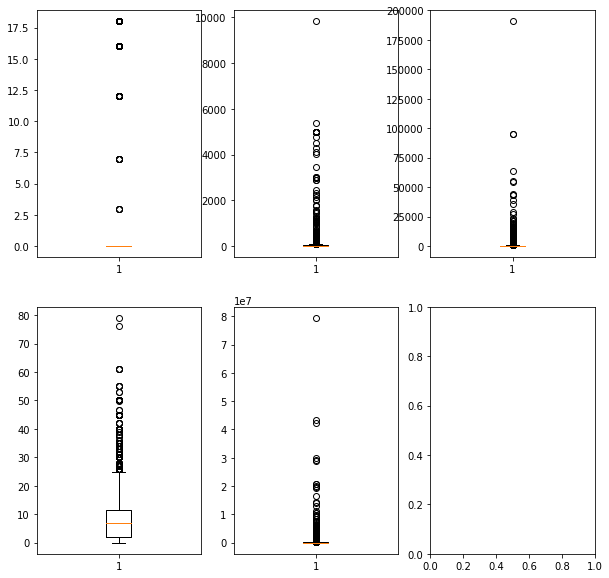

In [7]:
import matplotlib.pyplot as plt

# Multiple box plots on one Axes
fig, ax = plt.subplots(2,3,figsize=[10,10])
ax[0,0].boxplot(df_train['required_age'])
ax[0,1].boxplot(df_train['achievements'])
ax[0,2].boxplot(df_train['average_playtime'])
ax[1,0].boxplot(df_train['price'])
ax[1,1].boxplot(df_train['estimated_sells'])
plt.show()

In [8]:
fig = px.histogram(df_train, x='price',histnorm='probability')
fig.show()

In [9]:
fig = px.histogram(df_train, x='required_age',histnorm='probability')
fig.show()

In [10]:
fig = px.histogram(df_train, x='release_date',histnorm='probability')
fig.show()

In [11]:
fig = px.histogram(df_train, x='average_playtime',histnorm='probability density')
fig.show()

In [12]:
fig = px.histogram(df_train, x='achievements',histnorm='probability')
fig.show()

In [13]:
fig = px.histogram(df_train[df_train['estimated_sells']<1000000], x='estimated_sells',histnorm='probability')
fig.show()

# Distribuciones de Variables Categóricas
Para las variables categóricas, se genera un conteo de valores únicos.

In [14]:
fig = px.histogram(df_train, x='platforms')
fig.show()

In [15]:
fig = px.histogram(df_train, x='english')
fig.show()

In [16]:
fig = px.histogram(df_train, x='rating')
fig.show()

In [17]:
!pip install statsmodels==0.13.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [18]:
import statsmodels

In [19]:
fig = px.scatter(df_train[df_train['estimated_sells']<100000],
           x='achievements',
           y='estimated_sells',
           trendline='ols',
           title=(
               'Relación entre cantidad de logros y la venta estimada del videojuego '
               '<br><sup>Se muestra una la existencia de una relación lineal '
               'entre ambas variables a través de una regresión lineal con '
               'un buen ajuste (R² = 0).</sup></br>'
           ))
fig.show()

results = px.get_trendline_results(fig)
results.loc[0].item().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.502
Date:                Sat, 25 Dec 2021   Prob (F-statistic):              0.114
Time:                        02:02:03   Log-Likelihood:                -71133.
No. Observations:                6235   AIC:                         1.423e+05
Df Residuals:                    6233   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.399e+04    279.132     85.939      0.000    2.34e+04    2.45e+04
x1            -1.4929      0.944     -1.582      0.114      -3.343       0.357
==============================================================================
Omnibus:                     1547.820   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3053.727
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                       4.574   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
fig = px.scatter(df_train[df_train['estimated_sells']<100000],
           x='price',
           y='estimated_sells',
           trendline='ols',
           title=(
               'Relación entre el precio de salida del videojuego y las ventas estimadas '
               '<br><sup>Se muestra una la existencia de una relación lineal '
               'entre ambas variables a través de una regresión lineal con '
               'un buen ajuste (R² = 0.004).</sup></br>'
           ))
fig.show()

results = px.get_trendline_results(fig)
results.loc[0].item().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     53.58
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           2.79e-13
Time:                        02:02:04   Log-Likelihood:                -71108.
No. Observations:                6235   AIC:                         1.422e+05
Df Residuals:                    6233   BIC:                         1.422e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.199e+04    381.057     57.716      0.000    2.12e+04    2.27e+04
x1           257.0200     35.112      7.320      0.000     188.188     325.852
==============================================================================
Omnibus:                     1537.195   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3025.964
Skew:                           1.512   Prob(JB):                         0.00
Kurtosis:                       4.581   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
fig = px.scatter(df_train[df_train['estimated_sells']<100000],
           x='average_playtime',
           y='estimated_sells',
           trendline='ols',
           title=(
               'Relación entre la masa el tiempo promedio de ventas y las ventas estimadas d '
               '<br><sup>Se muestra una la existencia de una relación lineal '
               'entre ambas variables a través de una regresión lineal con '
               'un buen ajuste (R² = 0.026).</sup></br>'
           ))
fig.show()

results = px.get_trendline_results(fig)
results.loc[0].item().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.984
Date:                Sat, 25 Dec 2021   Prob (F-statistic):            0.00273
Time:                        02:02:04   Log-Likelihood:                -71130.
No. Observations:                6235   AIC:                         1.423e+05
Df Residuals:                    6233   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.386e+04    276.871     86.171      0.000    2.33e+04    2.44e+04
x1             0.2447      0.082      2.997      0.003       0.085       0.405
==============================================================================
Omnibus:                     1547.764   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3058.961
Skew:                           1.520   Prob(JB):                         0.00
Kurtosis:                       4.590   Cond. No.                     3.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
fig = px.scatter(df_train[df_train['estimated_sells']<100000],
           x='required_age',
           y='estimated_sells',
           trendline='ols',
           title=(
               'Relación entre la edad requerida para jugar y las ventas estimadas del videojuego '
               '<br><sup>Se muestra una la existencia de una relación lineal '
               'entre ambas variables a través de una regresión lineal con '
               'un buen ajuste (R² = 0.012).</sup></br>'
           ))
fig.show()

results = px.get_trendline_results(fig)
results.loc[0].item().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     30.77
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           3.02e-08
Time:                        02:02:04   Log-Likelihood:                -71119.
No. Observations:                6235   AIC:                         1.422e+05
Df Residuals:                    6233   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.368e+04    279.092     84.836      0.000    2.31e+04    2.42e+04
x1           596.7591    107.572      5.548      0.000     385.880     807.638
==============================================================================
Omnibus:                     1544.964   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3049.520
Skew:                           1.518   Prob(JB):                         0.00
Kurtosis:                       4.586   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
fig = px.scatter_matrix(df_train[df_train['estimated_sells']<100000],
                        height=1000,
                        dimensions=[
                            "price", "estimated_sells",
                            "average_playtime"
                        ],
                        symbol="rating",
                        color="rating")
fig.show()

In [24]:
fig = px.scatter_matrix(df_train[df_train['estimated_sells']<100000],
                        height=1000,
                        dimensions=[
                            "price", "rating",
                            "average_playtime"
                        ],
                        color="estimated_sells")
fig.show()

In [25]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

fig = sp.make_subplots(rows=2, cols=1)

days = ['Negative', 'Mixed','Positive', 'Mostly Positive', 'Very Positive']
df = df_train[df_train['estimated_sells']<100000]
fig = go.Figure()
for day in days:
    fig_1 = fig.add_trace(go.Violin(
                      x=df['rating'][df['rating'] == day],
                      y=df['estimated_sells'][df['rating'] == day],
                      name=day,
                      box_visible=True,
                      meanline_visible=True))

                                 
#fig_2 = px.box(df_train[df_train['estimated_sells']<100000], x="rating", y="estimated_sells")

#fig.add_trace(fig_2.data[0], row=2, col=1)

#fig.update_layout(height=800)
fig.show()

In [26]:
fig = sp.make_subplots(rows=2, cols=1)

fig_1 = px.violin(df_train[df_train['estimated_sells']<100000],
                  x="platforms",
                  y="estimated_sells",
                  title="Violin plot OverallQuall vs SalePrice")
fig.add_trace(fig_1.data[0], row=1, col=1)

fig_2 = px.box(df_train[df_train['estimated_sells']<100000], x="platforms", y="estimated_sells")

fig.add_trace(fig_2.data[0], row=2, col=1)

fig.update_layout(height=800)
fig.show()

In [27]:
fig = sp.make_subplots(rows=2, cols=1)

fig_1 = px.violin(df_train[df_train['estimated_sells']<100000],
                  x="english",
                  y="estimated_sells",
                  title="Violin plot OverallQuall vs SalePrice")
fig.add_trace(fig_1.data[0], row=1, col=1)

fig_2 = px.box(df_train[df_train['estimated_sells']<100000], x="english", y="estimated_sells")

fig.add_trace(fig_2.data[0], row=2, col=1)

fig.update_layout(height=800)
fig.show()

In [28]:
df_train.corr()

,english,required_age,achievements,average_playtime,price,estimated_sells
english,1.000000,0.015799,0.009748,-0.007678,0.018056,0.014292
required_age,0.015799,1.000000,-0.001500,0.026692,0.157875,0.110789
achievements,0.009748,-0.001500,1.000000,0.000825,-0.026374,0.022180
average_playtime,-0.007678,0.026692,0.000825,1.000000,0.045651,0.161612
price,0.018056,0.157875,-0.026374,0.045651,1.000000,0.062935
estimated_sells,0.014292,0.110789,0.022180,0.161612,0.062935,1.000000


In [29]:
px.imshow(
    df_train.corr().loc[["estimated_sells"], :].sort_values("estimated_sells", axis=1),
    zmin=-1,
    zmax=1,
    color_continuous_midpoint=0,
    color_continuous_scale=px.colors.sequential.Viridis,
)

# UMAP 

Reducción de dimensionalidad utilizando UMAP 

In [30]:
!pip install umap-learn
!pip install pyarrow

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [31]:
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.pipeline import Pipeline

In [32]:
df_train_2= df_train[df_train.columns.difference(['estimated_sells','rating','name','release_date','developer','publisher','platforms','categories','genres','tags','short_description','rating','estimated_sells'])]
df_test_2= df_test[df_test.columns.difference(['estimated_sells','rating','name','release_date','developer','publisher','platforms','categories','genres','tags','short_description','rating','estimated_sells'])]

labels = df_train[df_train.columns[14:16]]

In [33]:

steps = [('StandarScaler',StandardScaler()),('umap', UMAP(n_components=2),)]
pipeline = Pipeline(steps)
train_umap_results = pipeline.fit_transform(df_train_2)

test_umap_results = pipeline.transform(df_test_2)


/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/collections.py:1099: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



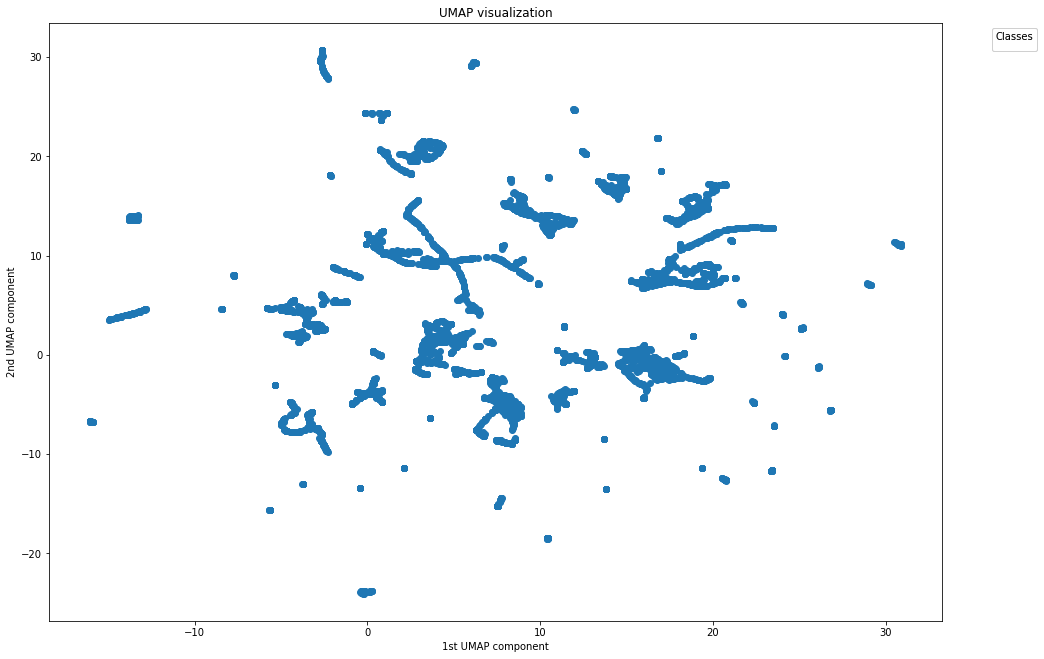

In [34]:
import matplotlib.pyplot as plt
# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=train_umap_results[:,0], 
    y=train_umap_results[:,1],
)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("UMAP visualization")
plt.xlabel("1st UMAP component")
plt.ylabel("2nd UMAP component")
plt.show()



Al efectuar el análisis exploratorio de datos pudimos notar lo siguiente:

Ninguna columna presentaba valores nulos. Sin embargo, las colunas developer y publisher contienen 5365 y 3992 valores únicos y consideando que el dataset total es de 7881 estos valores podrían potencialemnte dificultar el análisis.


La variable precio se no parece tener una distribución parecida a una función conocida, sin embargo se puede ver que la gran mayoría de sus valores están entre 0 y 15 dólares. Las variablesde forma normal.

Del histograma de la required age se puede ver que la gran mayoría de los juegos no tienen restricción de edad.

Del histograma de fecha de lanzamiento se puede ver que distribuye similar a una normal, sin embargo se encuentra cortada en la última fecha. la gran mayoría de los juegos fuern lanzados entre marzo y abril de 2016.

del histograma de tiempo promedio de juego podemos ver que la gran mayoría de los juegos son jugados en promedio entre 0 y 2000 horas. Además existen algunos videojuegos con valores extremadamente algo en comparación con la mayoría. 

El gráfico de cantidad de logros tiene una distribución muy similar al anterior a diferencia que la mayoría de los datos están entre 0 y 180 logros y el valor máximo es cercano a 10000

La variable a predecir ventas estimadas tiene una densidad de probabilidad en la cual mientras más sea la cantidad de ventas es menos probable. la gran mayoría de los valores están entre 0 y 20k, y hay valores alejados de la media entre 200k y 1M de ventas.

A las variables categóricas plataforma, ingles y rating se les hizo un gráfico de barras.
Del gráfico de barras en plataforma se puede ver que la mayoría de los videojuegos sólo se lanzan para windows, seguido por windows;mac;linux. solo 1 de los juegos sólamente fue lanzado en mac.
Del gráfico de barras de la variable english se puede ver que la gran mayoría de los valores (7769) estpan en inglés y sólo 112 en otro idioma.
Para la variable a predecir ratinh, se tiene que los valores están entre 1197(very positive), negative(1290), Mixed(1656), Mostly positive(1707) y Positive(2031).


Se realizónun gráfico de dispercióny regresión lineal para las variables numéricas (logros, precio, tiempo promedio de juego y edad requerida) con la variable a predecir ventas estimadas.
Ninguna de las visualizaciones muestra una relación clara entre las variables ni buen ajuste, sin embargo tiempo promedio de juego es la con mejor ajuste R-cuadrad (0.05)

Se hizo una scatter matrix con las variables price, estimated sells, average playtim y rating, donde se puede diferencial principalente la variable price y estimated sells que influyen en el rating asignado.

Se hizo un gráfico de violin con rating y estiated sells, donde se ve que mientras mejor evaluado es el juego más ventas fueron realizadas.
También se hizo el mismo gráfico para plataforma y inglés, donde se puede ver como es de esperar que mientras mas plataformas el juego es compatible, más ventas se proyectan. Además para los juegos en ingles tienen una mejor respuesta de ventas.

Finalmente se estudió la correlación de las variables numéricas con las ventas estimadas y el tiempo promedio de juego es el con mejor correlación 0.295 seguido por cantidad de logros 0.05.

---

## 3. Preparación de Datos

En esta sección, se  limpiará y mejorará los datos presenten en el dataset. 
Vimos en las secciónes anteriores que no contamos con valores nulos por lo que no se debe hacer nada en esa parte. Eliminaremos los outliers mediante el calculo de cuartiles. 

In [35]:
#Eliminar outliers 
#Para esto calcularemos el Z score y eliminaremos aquellos valores que nos preocupan  de los numeric 
numeric = ['required_age','achievements','average_playtime','price']
Q1 = df_train[numeric].quantile(0.25)
Q3 = df_train[numeric].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_numeric = df_train[numeric]

df_numeric= df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric.index

required_age          0.0
achievements         35.0
average_playtime    251.0
price                 9.4
dtype: float64


Int64Index([   0,    1,    2,    4,    5,    7,    8,    9,   10,   11,
            ...
            7871, 7872, 7873, 7874, 7875, 7876, 7877, 7878, 7879, 7880],
           dtype='int64', length=6336)

Y volveremos a unirlo al dataset con las otras columnas. 

In [36]:
df_train = df_train[df_train.index.isin(df_numeric.index)]

Luego, preparamos un `ColumnTransformer` que prepara los datos:

In [37]:
## ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# Definimos un tokenizador con Stemming
stop_words = stopwords.words('english')
class StemmerTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

# Inicializamos tokenizador
tokenizador = StemmerTokenizer()


Definimos nuestras labels para cada modelo

In [39]:
labels_clf = df_train['rating']
labels_reg = df_train['estimated_sells']


Crearemos un transformador para poder utilizar las variables que tienen más de un valor con ; como palabras que podemos vectorizar.

In [40]:
from sklearn.preprocessing import FunctionTransformer


def separar(X):
     return X.str.replace(';',' ')


Funcion_Separar = FunctionTransformer(separar)

pipeline_word = Pipeline([('separar',Funcion_Separar),('words',CountVectorizer(tokenizer= StemmerTokenizer()))])

Finalmente crearemos dos preprocesadores para cada uno de nuestros modelos

In [41]:
preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('MinMaxScaler', MinMaxScaler(),['english','achievements', 'average_playtime', 'price','required_age']),
        ('unigrama',CountVectorizer(tokenizer= StemmerTokenizer()),'short_description'),
        ('bigrama',CountVectorizer(tokenizer= StemmerTokenizer(), ngram_range=(1,2)),'short_description'),
        ('unigrama2',pipeline_word,'categories'),
        ('unigrama3',pipeline_word,'genres'),
        ('unigrama4',pipeline_word,'tags'),
        ('unigrama5',pipeline_word,'platforms'),
      
    ])

preprocessing_transformer2 = ColumnTransformer(
    transformers =[
        ('MinMaxScaler', MinMaxScaler(),['english','achievements', 'average_playtime', 'price','required_age']),   
     ]
)





...

---

## 4. Baseline

Adjuntamos las transformaciones hechas en la sección anterior en 2 pipelines con sus modelos correspondientes. 

In [42]:
## Código
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LassoLars
from sklearn.naive_bayes import MultinomialNB

pipeline_clf = Pipeline([
    
    ('Column_Transformer', preprocessing_transformer),
    ('model',MultinomialNB())

])

pipeline_reg = Pipeline([
    ('Column_Transformer', preprocessing_transformer2),
    ('model' ,LassoLars(alpha=.15, normalize=False))

])




Definimos nuestras métricas a utilizar 

In [43]:
# Metricas de evaluación
from sklearn.metrics import f1_score,r2_score

Separamos nuestros datasets 

In [44]:

from sklearn.model_selection import train_test_split 
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df_train[df_train.columns.difference(['rating','estimated_sales'])],labels_clf, test_size=0.33, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df_train,labels_reg, test_size=0.33, random_state=42)

Y evaluamos ambos modelos

In [45]:

# Evalauación
pipeline_clf = pipeline_clf.fit(X_train_clf,y_train_clf)
y_pred_clf= pipeline_clf.predict(X_test_clf)



In [46]:
print(f1_score(y_test_clf, y_pred_clf,average='weighted'))

0.247573799469094


In [47]:
pipeline_reg = pipeline_reg.fit(X_train_reg,y_train_reg)
y_pred_reg= pipeline_reg.predict(X_test_reg)

In [48]:
print(r2_score(y_test_reg, y_pred_reg))

0.10767646583099788


Se obtiene como resultado entonces para el clasificador un f1_score de 0.247573799469094 y para la regression lineal de  0.10767646583099788

---

## 5. Optimización del Modelo

Ahora, agregamos selección y/o reducción de atributos y probaremos una combinación de diferentes parámetros para mejorar nuestro modelo:


*Nota*: Procuren hacer Gridsearch sobre espacios de búsqueda razonables. Es decir, no estén 3 días buscando la mejor configuración...

In [49]:
from sklearn import linear_model
from sklearn import linear_model
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
param_grid = [
    {'Modelo': linear_model.Ridge(alpha=.5,random_state=20),
        "Selection__percentile": range(5, 101, 5),
    "Preprocessing_bow_ngram_range":[(1,1),(1,2),(1,3)]}
    ,
    {'Modelo': linear_model.LassoLars(alpha=.15, normalize=False,random_state=20),
        "Selection__percentile": range(5, 101, 5),
    "Preprocessing_bow_ngram_range":[(1,1),(1,2),(1,3)] }
]
param_grid
hgs = HalvingGridSearchCV(pipeline_reg, param_grid,verbose=10)

ValueError: Parameter grid for parameter (Modelo) needs to be a list or numpy array, but got (<class 'sklearn.linear_model._ridge.Ridge'>). Single values need to be wrapped in a list with one element.

Pudimos ver que mejor modelo mejora/no mejora los resultados obtenidos en el baseline.

In [ ]:
# gs_2.best_...

---

## 6. Conclusiones

En conclusión logramos ver que los modelos entrenados no tiene tan buenos como se esperaba. Se obtuvo un F1_score  de 0.24 lo que significa que es 0.04 mejor que la elección al azar mientras que la regresión lineal nos da un resultado de 0.1, lo que no es un buen rendimiento. 

La mayor dificultad se vio en la representación de aquelas columnas con más de un valor no numerico como lo son categorías,tags, etc. ya que con las diferentes ideas que se manejaron, ninguna tuvo resultados mejores por lo que se tomó la ruta de para el caso del clasificador verlas como palabras en un vector. Para el caso de la regresión, el agregar valores no inicialmente númericos también empeoró su resultado por lo que se decidió hacer un pipeline excluyendo estos valores. 

Como trabajo futuro se plantea buscar la mejor representación para estos casos donde los valores no estan unificados, además de probar más optimizaciones para mejorar el rendimiento. 


---

<br>

### Anexo: Generación de Archivo Submit de la Competencia

Para subir los resultados obtenidos a la pagina de CodaLab utilice la función `generateFiles` entregada mas abajo. Esto es debido a que usted deberá generar archivos que respeten extrictamente el formato de CodaLab, de lo contario los resultados no se veran reflejados en la pagina de la competencia.

Para los resultados obtenidos en su modelo de clasificación y regresión, estos serán guardados en un archivo zip que contenga los archivos `predicctions_clf.txt` para la clasificación y `predicctions_rgr.clf` para la regresión. Los resultados, como se comento antes, deberan ser obtenidos en base al dataset `test.pickle` y en cada una de las lineas deberan presentar las predicciones realizadas.

Ejemplos de archivos:

- [ ] `predicctions_clf.txt`

        Mostly Positive
        Mostly Positive
        Negative
        Positive
        Negative
        Positive
        ...

- [ ] `predicctions_rgr.txt`

        16103.58
        16103.58
        16041.89
        9328.62
        107976.03
        194374.08
        ...



In [56]:
import os

from zipfile import ZipFile

def generateFiles(predict_data, clf_pipe, rgr_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf
    rgr_pipe: pipeline del rgr

    Ouput
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict(predict_data)
    y_pred_rgr = rgr_pipe.predict(predict_data)
    
    with open('./predictions_clf.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with open('./predictions_rgr.txt', 'w') as f:
        for item in y_pred_rgr:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj2:
       zipObj2.write('predictions_rgr.txt')
       zipObj2.write('predictions_clf.txt')

    os.remove("predictions_rgr.txt")
    os.remove("predictions_clf.txt")

In [57]:
generateFiles(df_train, pipeline_clf, pipeline_reg)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb93c434-7bfe-47da-aa30-7b3326950928' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>